Imports

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics



%matplotlib inline

# for providing path
import os

In [137]:
data = pd.read_csv("/content/drive/MyDrive/kenya_crime.csv")

In [138]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD,Latitude,Longitude
0,Carjacking,2020,10,2,10,2,Uhuru Park,-1.291162,36.815952
1,Road Carnage,2017,7,15,16,44,Thika,-1.035813,37.083901
2,Road Carnage,2019,12,4,15,13,Kibera,-1.315951,36.790439
3,Fraud,2017,11,3,15,14,Parklands,-1.259163,36.820674
4,Sexual Assault,2017,4,18,16,24,Uhuru Park,-1.290393,36.816583


In [139]:
data.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD,Latitude,Longitude
373,Drug Charges,2019,11,8,19,16,South C,-1.312034,36.822561
374,Armed Robbery,2017,1,10,21,50,Kahawa West,-1.187061,36.899923
375,Terrorism,2018,6,24,0,52,South C,-1.312034,36.822561
376,Fraud,2020,7,11,18,11,Kibera,-1.314278,36.793722
377,Pick Pocketing,2017,11,6,19,0,Ngong,-1.375660,36.675925


In [140]:
data.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'NEIGHBOURHOOD',
       'Latitude', 'Longitude'],
      dtype='object')

In [141]:
data.shape

(378, 9)

In [142]:
data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,Latitude,Longitude
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,2018.375661,6.502646,15.523810,11.857143,28.793651,-1.261730,36.846386
std,1.124429,3.390773,8.951429,7.237224,17.452315,0.087407,0.100312
min,2017.000000,1.000000,1.000000,0.000000,0.000000,-1.375660,36.651206
25%,2017.000000,4.000000,8.000000,5.000000,14.250000,-1.314278,36.809076
50%,2018.000000,7.000000,15.000000,12.000000,28.500000,-1.298356,36.821618
75%,2019.000000,9.000000,23.750000,18.000000,43.750000,-1.204867,36.899923
max,2020.000000,12.000000,31.000000,24.000000,60.000000,-1.028089,37.101239


In [143]:
  data.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
NEIGHBOURHOOD    0
Latitude         0
Longitude        0
dtype: int64

In [144]:
updated_df = data.dropna(axis=0)


In [145]:
# updated_df.drop(['HUNDRED_BLOCK'], inplace=True, axis = 1)

In [146]:
updated_df.drop(['Latitude','Longitude'], inplace=True, axis = 1)

In [147]:
updated_df.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
NEIGHBOURHOOD    0
dtype: int64

In [148]:
#visualization

In [149]:
updated_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,Carjacking,2020,10,2,10,2,Uhuru Park
1,Road Carnage,2017,7,15,16,44,Thika
2,Road Carnage,2019,12,4,15,13,Kibera
3,Fraud,2017,11,3,15,14,Parklands
4,Sexual Assault,2017,4,18,16,24,Uhuru Park


Analysis of the data
1. No of neighbourhoods


In [150]:
print('There are ' + str(updated_df.NEIGHBOURHOOD.nunique()) + ' listed neighbourhoods, and they are:')
print(updated_df.NEIGHBOURHOOD.unique())

There are 10 listed neighbourhoods, and they are:
['Uhuru Park' 'Thika' 'Kibera' 'Parklands' 'UpperHill' 'South C'
 'Kahawa West' 'South B' 'Githurai' 'Ngong']


2. No. of crimes per neighbourhood

In [151]:
nc = pd.DataFrame([updated_df['YEAR'], updated_df['NEIGHBOURHOOD'], updated_df['TYPE']]).T 


In [152]:
ncavg = nc.groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index()
ncavg.head()

,YEAR,NEIGHBOURHOOD,TYPE
0,2017,Githurai,11
1,2017,Kahawa West,15
2,2017,Kibera,12
3,2017,Ngong,10
4,2017,Parklands,8


In [153]:
ncavg = ncavg.drop('YEAR', axis = 1)
ncavg.columns = ["Neighborhood", "Avg"]
ncavg = ncavg.groupby(['Neighborhood'])['Avg'].mean()
ncavg.head()

Neighborhood
Githurai        9.00
Kahawa West     9.00
Kibera         11.25
Ngong           9.00
Parklands       9.00
Name: Avg, dtype: float64

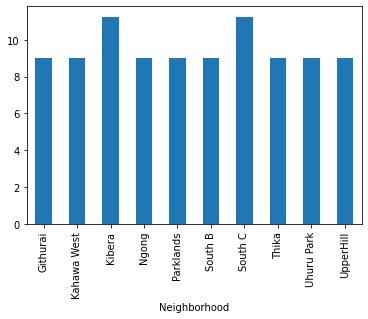

In [154]:
plotnc = ncavg.plot(kind = 'bar')

3. Crimes per Year

In [155]:
yc = pd.DataFrame([updated_df['YEAR'], updated_df['TYPE']]).T
yc.head()

,YEAR,TYPE
0,2020,Carjacking
1,2017,Road Carnage
2,2019,Road Carnage
3,2017,Fraud
4,2017,Sexual Assault


In [156]:
ycTotal = yc.groupby(['YEAR']).count().reset_index()
ycTotal.columns = ['Year','Total']
ycTotal

,Year,Total
0,2017,107
1,2018,109
2,2019,75
3,2020,87


Text(0.5, 1.0, 'No. of crime per year in Vancouver')

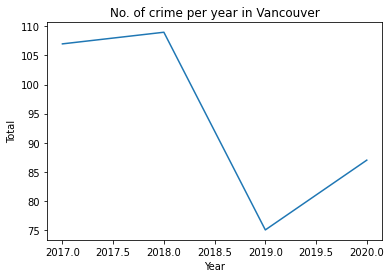

In [157]:
sns.lineplot(data=ycTotal, x="Year", y="Total").set_title('No. of crime per year in Vancouver')

4. Types of crimes and number

In [158]:
tc = pd.DataFrame(updated_df['TYPE'])
tc.head()

,TYPE
0,Carjacking
1,Road Carnage
2,Road Carnage
3,Fraud
4,Sexual Assault


In [159]:
tcCount = tc['TYPE'].value_counts()
tcCount

Armed Robbery     54
Road Carnage      51
Terrorism         49
Pick Pocketing    48
Carjacking        47
Sexual Assault    45
Fraud             44
Drug Charges      40
Name: TYPE, dtype: int64

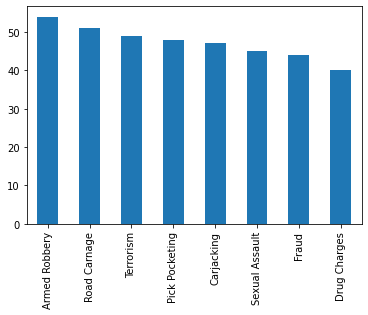

In [160]:
plottc = tcCount.plot(kind = 'bar')

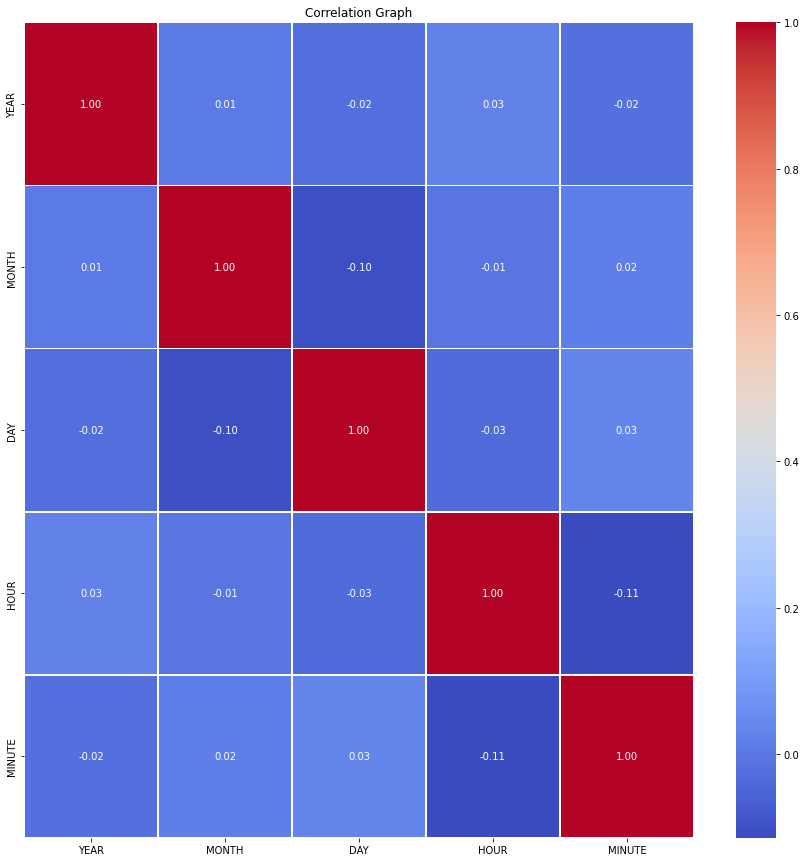

In [161]:
corr_matrix = updated_df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

Heatmap

In [162]:
mapObj= folium.Map(location=[-1.286389, 36.817223],zoom_start=6.5)
mapObj.save('laPointMap.html')

In [163]:
heatmap_df=data[['YEAR','Latitude','Longitude']].copy()

In [164]:
print(heatmap_df)

     YEAR  Latitude  Longitude
0    2020 -1.291162  36.815952
1    2017 -1.035813  37.083901
2    2019 -1.315951  36.790439
3    2017 -1.259163  36.820674
4    2017 -1.290393  36.816583
..    ...       ...        ...
373  2019 -1.312034  36.822561
374  2017 -1.187061  36.899923
375  2018 -1.312034  36.822561
376  2020 -1.314278  36.793722
377  2017 -1.375660  36.675925

[378 rows x 3 columns]


In [165]:
heatmap_df2017=heatmap_df.query('YEAR==2017')

In [166]:
heatmap_df2017.head()

,YEAR,Latitude,Longitude
1,2017,-1.035813,37.083901
3,2017,-1.259163,36.820674
4,2017,-1.290393,36.816583
8,2017,-1.298163,36.818164
10,2017,-1.181697,36.903485


In [167]:
heatmap_2017=heatmap_df2017[['Latitude','Longitude']].copy()


In [214]:
heat_array=heatmap_df[['Latitude','Longitude']].to_numpy()
# print(heat_array)

In [169]:
HeatMap(heat_array).add_to(mapObj)

# save the map object as html
mapObj.save("output.html")

Encoding

In [170]:
le = LabelEncoder()

In [171]:
le2 = LabelEncoder()

In [172]:
updated_df['TYPE']= le.fit_transform(updated_df['TYPE'])


In [173]:
 updated_df['TYPE'].nunique()

8

In [174]:
 updated_df['NEIGHBOURHOOD']= le2.fit_transform(updated_df['NEIGHBOURHOOD'])

In [175]:
updated_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,1,2020,10,2,10,2,8
1,5,2017,7,15,16,44,7
2,5,2019,12,4,15,13,2
3,3,2017,11,3,15,14,4
4,6,2017,4,18,16,24,8


Splitting the data and target

In [176]:
X = updated_df.iloc[:,1:]


In [177]:
X.head()


,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD
0,2020,10,2,10,2,8
1,2017,7,15,16,44,7
2,2019,12,4,15,13,2
3,2017,11,3,15,14,4
4,2017,4,18,16,24,8


In [178]:
Y = updated_df.iloc[:,0]


In [179]:
Y.head()

0    1
1    5
2    5
3    3
4    6
Name: TYPE, dtype: int64

In [180]:
print(le.inverse_transform(Y))

['Carjacking' 'Road Carnage' 'Road Carnage' 'Fraud' 'Sexual Assault'
 'Road Carnage' 'Armed Robbery' 'Armed Robbery' 'Carjacking'
 'Pick Pocketing' 'Terrorism' 'Pick Pocketing' 'Road Carnage' 'Terrorism'
 'Terrorism' 'Terrorism' 'Fraud' 'Fraud' 'Drug Charges' 'Terrorism'
 'Carjacking' 'Carjacking' 'Drug Charges' 'Fraud' 'Pick Pocketing' 'Fraud'
 'Drug Charges' 'Sexual Assault' 'Armed Robbery' 'Carjacking'
 'Pick Pocketing' 'Road Carnage' 'Carjacking' 'Terrorism' 'Terrorism'
 'Fraud' 'Sexual Assault' 'Drug Charges' 'Pick Pocketing' 'Road Carnage'
 'Terrorism' 'Armed Robbery' 'Terrorism' 'Sexual Assault' 'Fraud'
 'Armed Robbery' 'Pick Pocketing' 'Pick Pocketing' 'Terrorism'
 'Road Carnage' 'Armed Robbery' 'Fraud' 'Carjacking' 'Drug Charges'
 'Pick Pocketing' 'Fraud' 'Terrorism' 'Carjacking' 'Pick Pocketing'
 'Armed Robbery' 'Armed Robbery' 'Fraud' 'Fraud' 'Sexual Assault'
 'Armed Robbery' 'Carjacking' 'Road Carnage' 'Road Carnage' 'Drug Charges'
 'Carjacking' 'Pick Pocketing' 'Armed Robb

In [181]:
X, Y = make_classification(n_samples=15000, n_features=6, n_informative=6, n_redundant=0, n_classes=8, random_state=1)


In [182]:
print(X)

[[ 1.41253291e-03  1.82668170e-01  3.13353898e+00  6.44006039e-01
   1.96721664e+00 -3.12806672e+00]
 [ 5.99582546e-01  1.79890461e+00 -5.82112504e-01  9.27773028e-01
  -3.21926433e+00 -2.39513970e+00]
 [-1.78809192e+00  8.93471719e-01 -1.59546823e+00  1.10571080e-01
   1.46415181e+00  3.83223106e-01]
 ...
 [ 8.03699688e-01 -3.94058807e-02 -1.32650711e+00 -4.31710605e-01
  -2.04018518e+00 -2.16175592e-01]
 [-3.10464568e-01  2.35142501e+00 -1.78090293e+00  1.36844543e+00
  -2.21568941e+00 -2.94598097e+00]
 [-1.39641572e+00  1.59135857e+00  2.40649761e+00  1.62951633e+00
   2.13594467e+00  3.52105852e-01]]


Splitting into training and testing data

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [184]:
# scaler = MaxAbsScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [185]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


Creating the Models

1. Logistic Regression

In [186]:
classifier = LogisticRegression(multi_class='multinomial', solver='saga', C=1.0, max_iter=200)


In [187]:
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=200, multi_class='multinomial', solver='saga')

In [188]:
predicted_y = classifier.predict(X_test)


In [189]:
print(predicted_y)

[2 6 0 ... 5 4 2]


In [190]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.38


In [191]:
cnf_matrix = metrics.confusion_matrix(Y_test, predicted_y)
cnf_matrix

array([[154,   7,   5,  26,  50,  61,  59,  14],
       [  1, 132,  66,  36,  53,  40,   5,  17],
       [  2,  34, 158,  51,  46,   1,  44,  27],
       [ 23,  34,  78,  74,  11,  67,  48,  29],
       [ 36,  90,  54,  36, 119,  14,   9,  20],
       [ 31,  13,   1,  49,   9, 253,  13,  16],
       [ 91,  10,  22,  23,  23,  10, 174,  34],
       [ 37,  37,  31,  58,  28,  35, 107,  64]])

In [192]:
print(metrics.precision_score(Y_test, predicted_y, average='micro'))
print(metrics.accuracy_score(Y_test, predicted_y))
print(metrics.recall_score(Y_test, predicted_y, average='micro'))
print(metrics.mean_absolute_error(Y_test, predicted_y))



0.376
0.376
0.376
1.912


2. Naive Bayes Algorithm

In [193]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() 
nv.fit(X_train,Y_train) 

GaussianNB()

In [194]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) 

print(y_pred)

[4 6 0 ... 5 4 7]


In [195]:
#accuracy_score(Y_test,y_pred)

result = metrics.confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred)
print("Classification Report:")
print (result1)
print(metrics.precision_score(Y_test, y_pred, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.recall_score(Y_test, y_pred, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred))

Confusion Matrix:
[[198  10   7  10  40  75  28   8]
 [  2 148  61  15  50  54   8  12]
 [  1  40 195  48  29   0  37  13]
 [ 27  45  78  94   9  59  30  22]
 [ 51 113  47  50  98   5   5   9]
 [ 47  12   5  41   3 257   7  13]
 [124   9  15  42  22  19 141  15]
 [ 47  32  48  47  23  21  83  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.53      0.45       376
           1       0.36      0.42      0.39       350
           2       0.43      0.54      0.48       363
           3       0.27      0.26      0.26       364
           4       0.36      0.26      0.30       378
           5       0.52      0.67      0.59       385
           6       0.42      0.36      0.39       387
           7       0.51      0.24      0.33       397

    accuracy                           0.41      3000
   macro avg       0.41      0.41      0.40      3000
weighted avg       0.41      0.41      0.40      3000

0.409
0.409
0.409
1.88


3. KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
knn_clf=KNeighborsClassifier(n_neighbors = 50)
knn_clf.fit(X_train,Y_train)
y_pred_knn=knn_clf.predict(X_test)

In [198]:

result = metrics.confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred_knn)
print("Classification Report:")
print (result1)
#result2 = accuracy_score(Y_test,y_pred_knn)
#print("Accuracy:",result2)
print(metrics.precision_score(Y_test, y_pred_knn, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred_knn))
print(metrics.recall_score(Y_test, y_pred_knn, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred_knn))

Confusion Matrix:
[[285   2   8   0  20  17  25  19]
 [  7 278  24   5  13   8   5  10]
 [  2   5 278  26  17   0  15  20]
 [  5  20  25 263  12  23   6  10]
 [ 15  11  31  26 275   2   5  13]
 [ 16  33   7  17   5 285   6  16]
 [ 41  10  16  19  19  13 252  17]
 [ 29  19  23   6  18  12  19 271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       376
           1       0.74      0.79      0.76       350
           2       0.67      0.77      0.72       363
           3       0.73      0.72      0.72       364
           4       0.73      0.73      0.73       378
           5       0.79      0.74      0.77       385
           6       0.76      0.65      0.70       387
           7       0.72      0.68      0.70       397

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000

0.729
0.729
0.729
0.8893333

4. SVM

In [199]:
#from sklearn.svm import LinearSVC


In [200]:
# clf = LinearSVC(random_state=0, tol=1e-5)

In [201]:
# clf.fit(X_train, Y_train.ravel()) 

In [202]:
# y_pred_svc=clf.predict(X_test)

In [203]:
# result = metrics.confusion_matrix(Y_test, y_pred_svc)
# print("Confusion Matrix:")
# print(result)
# result1 = metrics.classification_report(Y_test,y_pred_svc)
# print("Classification Report:")
# print (result1)
# #result2 = accuracy_score(Y_test,y_pred_knn)
# #print("Accuracy:",result2)
# print(metrics.precision_score(Y_test, y_pred_svc, average='micro'))
# print(metrics.accuracy_score(Y_test, y_pred_svc))
# print(metrics.recall_score(Y_test, y_pred_svc, average='micro'))
# print(metrics.mean_absolute_error(Y_test, y_pred_svc))

5. Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 2)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [205]:
y_pred_rf=classifier_rf.predict(X_test)

In [206]:
import pickle
pickle.dump(classifier_rf, open('rf_model.pkl', 'wb'))

In [207]:
# test = [2009,9,5,0,42,8,490245.93,5459326.44,49.28661123,-123.1341283]
test = [2017,9,5,0,42,8]

In [208]:
model = pickle.load(open('rf_model.pkl','rb'))
print(model.predict([test]))

[7]


In [209]:
y_pred_rf2=classifier_rf.predict([test,test])

In [210]:
print(y_pred_rf2)

[7 7]


In [211]:
print(le.inverse_transform(y_pred_rf2))
print(le2.inverse_transform([0,1,2,3,4,5,6,7,8,9]))
print(le.inverse_transform([0,1,2,3,4,5,6,7]))

['Terrorism' 'Terrorism']
['Githurai' 'Kahawa West' 'Kibera' 'Ngong' 'Parklands' 'South B' 'South C'
 'Thika' 'Uhuru Park' 'UpperHill']
['Armed Robbery' 'Carjacking' 'Drug Charges' 'Fraud' 'Pick Pocketing'
 'Road Carnage' 'Sexual Assault' 'Terrorism']


In [212]:
print(y_pred_rf)

[3 6 6 ... 5 1 2]


In [213]:
result = metrics.confusion_matrix(Y_test, y_pred_rf)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test,y_pred_rf)
print("Classification Report:")
print (result1)
#result2 = accuracy_score(Y_test,y_pred_rf)
#print("Accuracy:",result2)
print(metrics.precision_score(Y_test, y_pred_rf, average='micro'))
print(metrics.accuracy_score(Y_test, y_pred_rf))
print(metrics.recall_score(Y_test, y_pred_rf, average='micro'))
print(metrics.mean_absolute_error(Y_test, y_pred_rf))

Confusion Matrix:
[[273   6   6   4  21  18  25  23]
 [  8 275  18   8  15  10   4  12]
 [  2   8 281  20  19   1  13  19]
 [  2   8  15 284  12  27   6  10]
 [ 14  13  21  18 288   5  10   9]
 [ 14  27   5  17   3 293  11  15]
 [ 43  11  12  20  11  17 259  14]
 [ 24  12  17   9  15  13  27 280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       376
           1       0.76      0.79      0.77       350
           2       0.75      0.77      0.76       363
           3       0.75      0.78      0.76       364
           4       0.75      0.76      0.76       378
           5       0.76      0.76      0.76       385
           6       0.73      0.67      0.70       387
           7       0.73      0.71      0.72       397

    accuracy                           0.74      3000
   macro avg       0.74      0.75      0.74      3000
weighted avg       0.74      0.74      0.74      3000

0.7443333333333333
0.744333